In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

/home/rodrigo/.local/lib/python3.10/site-packages/pandas/core/arrays/masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [2]:
def optimizar_y_aplicar_kmeans(df):
    max_clusters = 20

    inertias = []
    for i in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=i, random_state=42)
        kmeans.fit(df)
        inertias.append(kmeans.inertia_)

    plt.figure(figsize=(10, 6))
    plt.plot(range(1, max_clusters + 1), inertias, marker='o')
    plt.title('Método del codo')
    plt.xlabel('Número de clusters')
    plt.ylabel('Inercia')
    plt.show()

In [3]:
def crear_sub_dataset(dataframe, columnas):
    """
    Crea un sub-dataset a partir de las columnas especificadas de un DataFrame.

    Parámetros:
    - dataframe: DataFrame de pandas del cual crear el sub-dataset.
    - columnas: Lista de strings con los nombres de las columnas a incluir en el sub-dataset.

    Retorna:
    - Un nuevo DataFrame que contiene solo las columnas especificadas.
    """
    sub_dataset = dataframe[columnas].copy()
    return sub_dataset

In [4]:
df_enfermedades = pd.read_csv('2009_2022_Enfermedades_Respiratorias_COVID.csv')
df_enfermedades['FECHA'] = pd.to_datetime(df_enfermedades['FECHA'], format='%d/%m/%Y')

In [5]:
coordenadas = crear_sub_dataset(df_enfermedades, ['LAT_DECIMAL', 'LON_DECIMAL'])
print(coordenadas.head())

   LAT_DECIMAL  LON_DECIMAL
0    19.304898   -99.241515
1    19.371992   -99.157853
2    19.357350   -99.299792
3    19.191988   -99.089954
4    19.482945   -99.113471


/home/rodrigo/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/rodrigo/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/rodrigo/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/rodrigo/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'au

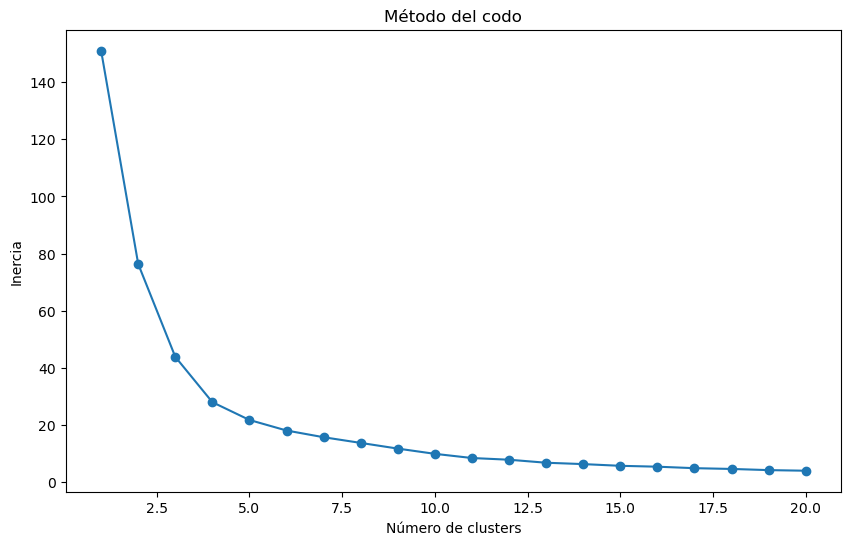

In [6]:
optimizar_y_aplicar_kmeans(coordenadas)

In [7]:
def crear_clusters(df, n_clusters_optimo):
    kmeans_optimo = KMeans(n_clusters=n_clusters_optimo, random_state=42)
    df['Cluster'] = kmeans_optimo.fit_predict(df)

In [8]:
num_cluster = 8
crear_clusters(coordenadas, num_cluster)
print(coordenadas)

/home/rodrigo/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


      LAT_DECIMAL  LON_DECIMAL  Cluster
0       19.304898   -99.241515        3
1       19.371992   -99.157853        2
2       19.357350   -99.299792        3
3       19.191988   -99.089954        4
4       19.482945   -99.113471        7
...           ...          ...      ...
8856    19.188889   -99.174166        0
8857    19.167499   -99.167499        0
8858    19.212500   -99.151667        6
8859    19.207135   -99.079148        4
8860    19.217777   -98.956944        1

[8861 rows x 3 columns]


In [9]:
df_enfermedades["Cluster"] = coordenadas["Cluster"]
print(df_enfermedades["Cluster"].head())

0    3
1    2
2    3
3    4
4    7
Name: Cluster, dtype: int32


In [10]:
df_enfermedades = crear_sub_dataset(df_enfermedades, ["Cluster", "LAT_DECIMAL", "LON_DECIMAL", "FECHA", "Total_Ingresos_Respiratorios_COVID", "Temperatura Promedio","Humedad relativa Promedio","PM25 Promedio","PM10 Promedio","O3 Promedio","SO2 Promedio", "CO Promedio","NO2 Promedio","NOX Promedio","NO Promedio"])
print(df_enfermedades.head())

   Cluster  LAT_DECIMAL  LON_DECIMAL      FECHA  \
0        3    19.304898   -99.241515 2009-01-01   
1        2    19.371992   -99.157853 2009-01-01   
2        3    19.357350   -99.299792 2009-01-01   
3        4    19.191988   -99.089954 2009-01-01   
4        7    19.482945   -99.113471 2009-01-01   

   Total_Ingresos_Respiratorios_COVID  Temperatura Promedio  \
0                                  12              13.50805   
1                                   9              13.85766   
2                                   8              13.38054   
3                                   1              13.65075   
4                                  94              14.18049   

   Humedad relativa Promedio  PM25 Promedio  PM10 Promedio  O3 Promedio  \
0                   48.25448       32.38168       54.07328     25.75485   
1                   48.46696       31.28841       61.75105     22.11455   
2                   48.72771       32.95124       60.81209     29.97649   
3             

In [11]:
df_enfermedades_cluster = df_enfermedades.groupby(['FECHA', 'Cluster']).agg({
        'Total_Ingresos_Respiratorios_COVID': 'sum',  # Suma
        'Temperatura Promedio': 'mean',  # Promedio
        'Humedad relativa Promedio': 'mean',  # Promedio
        'PM25 Promedio': 'mean',  # Promedio
        'PM10 Promedio': 'mean',  # Promedio
        'O3 Promedio': 'mean',  # Promedio
        'SO2 Promedio': 'mean',  # Promedio
        'CO Promedio': 'mean',  # Promedio
        'NO2 Promedio': 'mean',  # Promedio
        'NOX Promedio': 'mean',  # Promedio
        'NO Promedio': 'mean'  # Promedio
    }).reset_index()

print(df_enfermedades_cluster.head())

       FECHA  Cluster  Total_Ingresos_Respiratorios_COVID  \
0 2009-01-01        1                                  11   
1 2009-01-01        2                                 236   
2 2009-01-01        3                                  20   
3 2009-01-01        4                                   1   
4 2009-01-01        5                                  21   

   Temperatura Promedio  Humedad relativa Promedio  PM25 Promedio  \
0             13.617910                  50.536960      33.451070   
1             13.891092                  48.545468      31.790233   
2             13.444295                  48.491095      32.666460   
3             13.650750                  49.918330      32.999470   
4             13.603500                  50.789350      34.152880   

   PM10 Promedio  O3 Promedio  SO2 Promedio  CO Promedio  NO2 Promedio  \
0      65.017890     26.25071      5.648970     1.320600     40.537060   
1      61.974913     22.31762      8.779247     1.422013     41.743725

In [12]:
def contar_registros_por_año_y_cluster(df):
    df['Año'] = df['FECHA'].dt.year
    conteo = df.groupby(['Año', 'Cluster']).size().reset_index(name='Conteo')
    
    return conteo

In [13]:
conteo_clusters = contar_registros_por_año_y_cluster(df_enfermedades_cluster)
print(conteo_clusters)

      Año  Cluster  Conteo
0    2009        1      12
1    2009        2      12
2    2009        3      12
3    2009        4       3
4    2009        5      12
..    ...      ...     ...
105  2022        3      12
106  2022        4      12
107  2022        5      12
108  2022        6      12
109  2022        7      12

[110 rows x 3 columns]


In [14]:
print(df_enfermedades.head(5))

   Cluster  LAT_DECIMAL  LON_DECIMAL      FECHA  \
0        3    19.304898   -99.241515 2009-01-01   
1        2    19.371992   -99.157853 2009-01-01   
2        3    19.357350   -99.299792 2009-01-01   
3        4    19.191988   -99.089954 2009-01-01   
4        7    19.482945   -99.113471 2009-01-01   

   Total_Ingresos_Respiratorios_COVID  Temperatura Promedio  \
0                                  12              13.50805   
1                                   9              13.85766   
2                                   8              13.38054   
3                                   1              13.65075   
4                                  94              14.18049   

   Humedad relativa Promedio  PM25 Promedio  PM10 Promedio  O3 Promedio  \
0                   48.25448       32.38168       54.07328     25.75485   
1                   48.46696       31.28841       61.75105     22.11455   
2                   48.72771       32.95124       60.81209     29.97649   
3             

In [21]:
import folium
import pandas as pd
from shapely.geometry import MultiPoint
from folium.vector_layers import Polygon

# Calcula el centro del mapa
lat_center = df_enfermedades['LAT_DECIMAL'].mean()
lon_center = df_enfermedades['LON_DECIMAL'].mean()

# Crea un mapa centrado en las coordenadas medias
m = folium.Map(location=[lat_center, lon_center], zoom_start=11)

cluster_colors = {0: 'red', 1: 'blue', 2: 'green', 3: 'purple', 4: 'orange', 5:'cyan', 6: 'gray', 7: 'magenta',}

for cluster in df_enfermedades['Cluster'].unique():
    points = df_enfermedades[df_enfermedades['Cluster'] == cluster][['LAT_DECIMAL', 'LON_DECIMAL']].values

    for point in points:
        folium.CircleMarker(location=[point[0], point[1]],
                            radius=5,
                            color=cluster_colors[cluster],
                            fill=True,
                            fill_color=cluster_colors[cluster],
                            fill_opacity=0.6).add_to(m)

    multipoint = MultiPoint(points)
    convex_hull = multipoint.convex_hull
    hull_coordinates = list(convex_hull.exterior.coords)

    folium.Polygon(locations=hull_coordinates,
                    color=cluster_colors[cluster],
                    weight=0,
                    fill=True,
                    fill_color=cluster_colors[cluster],
                    fill_opacity=0.2).add_to(m)

In [23]:
m

In [17]:
df_enfermedades_cluster = df_enfermedades.groupby(['FECHA', 'Cluster']).agg({
        'Total_Ingresos_Respiratorios_COVID': 'sum',
        'Temperatura Promedio': 'mean',
        'Humedad relativa Promedio': 'mean',
        'PM25 Promedio': 'mean',
        'PM10 Promedio': 'mean',
        'O3 Promedio': 'mean',
        'SO2 Promedio': 'mean',
        'CO Promedio': 'mean', 
        'NO2 Promedio': 'mean',
        'NOX Promedio': 'mean',
        'NO Promedio': 'mean'
    }).reset_index()

print(df_enfermedades_cluster.head(10))

       FECHA  Cluster  Total_Ingresos_Respiratorios_COVID  \
0 2009-01-01        1                                  11   
1 2009-01-01        2                                 236   
2 2009-01-01        3                                  20   
3 2009-01-01        4                                   1   
4 2009-01-01        5                                  21   
5 2009-01-01        6                                  84   
6 2009-01-01        7                                 214   
7 2009-02-01        1                                  11   
8 2009-02-01        2                                 200   
9 2009-02-01        3                                  25   

   Temperatura Promedio  Humedad relativa Promedio  PM25 Promedio  \
0             13.617910                  50.536960      33.451070   
1             13.891092                  48.545468      31.790233   
2             13.444295                  48.491095      32.666460   
3             13.650750                  49.918330  

In [18]:
dfs_por_cluster = {}

for cluster, group_df in df_enfermedades_cluster.groupby('Cluster'):
    dfs_por_cluster[cluster] = group_df
    dfs_por_cluster[cluster].to_csv(f"datos_cluster_{cluster_colors[cluster]}{cluster}.csv", index=False)

print(dfs_por_cluster[0].head(10))

         FECHA  Cluster  Total_Ingresos_Respiratorios_COVID  \
75  2010-01-01        0                                   1   
89  2010-03-01        0                                   1   
115 2010-07-01        0                                   1   
134 2010-10-01        0                                   1   
141 2010-11-01        0                                   1   
149 2010-12-01        0                                   1   
156 2011-01-01        0                                   1   
200 2011-08-01        0                                   4   
207 2011-09-01        0                                   3   
214 2011-10-01        0                                   3   

     Temperatura Promedio  Humedad relativa Promedio  PM25 Promedio  \
75              13.622450                  57.882670      22.651660   
89              17.229620                  33.671250      19.555410   
115             16.633810                  73.715440      15.541400   
134             15.769